# Performance Review

该报告基于日收益数据给出详细的绩效评测。

In [1]:
import numpy as np
import pandas as pd
import pyodbc
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import yfinance as yf
import pyfolio as pf

In [2]:
#Get return data

##Skydog DB
# end_date=dt.date.today()
# conn=pyodbc.connect('DRIVER={SQL Server};SERVER=port-mgr-sql.database.windows.net;DATABASE=port-mgr-sql;UID=port-mgr;PWD=Randomwalk2020')
# sqlstr='''select date,
#         units,
#         unit_price,
#         market_value_usd
#         from portfolio_performance_analyse where portfolio='Skydog'
#         order by date
#         '''
# df=pd.read_sql_query(sqlstr,conn)
# df['date']=pd.to_datetime(df.date)
# df=df[df['date']<=end_date]
# df=df.set_index(['date'])
# port_rets=df['unit_price']/df['unit_price'].shift(1)-1
# port_rets.name='Skydog High Grwoth Fund'


##Get return data for King's portfolio
# df=pd.read_excel("data/king_snapshot_daily.xlsx")
# df=df.set_index(['snapshot_date'])
# df=df['2020-1-1':]
# port_rets=np.log(df['unit_price']/df['unit_price'].shift(1))

##Get return data from backtest output
# port_rets=pd.read_csv('output/trend_QQQ_returns.csv')
# port_rets['date']=pd.to_datetime(port_rets['index'])
# port_rets=port_rets.set_index('date')
# port_rets=port_rets['return']

#Get return from yahoo finance
ticker='BABA'
data=yf.download(ticker,dt.date(2000,1,1),dt.date.today(),auto_adjust=True)
port_rets=data.Close.pct_change().dropna()
port_rets

[*********************100%***********************]  1 of 1 completed


Date
2014-09-22   -0.042603
2014-09-23   -0.030259
2014-09-24    0.039004
2014-09-25   -0.018218
2014-09-26    0.017319
                ...   
2021-12-09   -0.009354
2021-12-10    0.009281
2021-12-13   -0.022549
2021-12-14    0.035504
2021-12-15   -0.032470
Name: Close, Length: 1823, dtype: float64

In [3]:
#准备benchmark数据

start_date=min(port_rets.index)
end_date=dt.date.today()
qqq_price=yf.download('QQQ',start_date, end_date, auto_adjust=True)
qqq_rets=qqq_price.Close/qqq_price.Close.shift(1)-1
mchi_price=yf.download('KWEB',start_date, end_date, auto_adjust=True)
mchi_rets=mchi_price.Close/mchi_price.Close.shift(1)-1
benchmark_rets=qqq_rets
benchmark_rets.name='Benchmark'

benchmark_rets



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2014-09-22         NaN
2014-09-23   -0.002726
2014-09-24    0.010731
2014-09-25   -0.021034
2014-09-26    0.010641
                ...   
2021-12-09   -0.014714
2021-12-10    0.010870
2021-12-13   -0.014447
2021-12-14   -0.010350
2021-12-15    0.022797
Name: Benchmark, Length: 1823, dtype: float64

Start date,2014-09-22
End date,2021-12-15
Total months,86
,Backtest
Annual return,3.742%
Cumulative returns,30.44%
Annual volatility,34.93%
Sharpe ratio,0.28
Calmar ratio,0.06
Stability,0.72
Max drawdown,-64.697%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,64.70,2020-10-27,2021-12-03,NaT,NaN
1,51.83,2014-11-10,2015-09-28,2017-05-09,652
2,38.06,2018-06-14,2019-01-03,2019-12-20,397
3,23.49,2020-01-13,2020-03-23,2020-07-06,126
4,18.37,2018-01-26,2018-04-06,2018-06-04,92


Stress Events,mean,min,max
Oct14,0.47%,-3.28%,3.80%
Fall2015,-0.70%,-5.64%,5.14%
New Normal,0.04%,-13.34%,13.29%


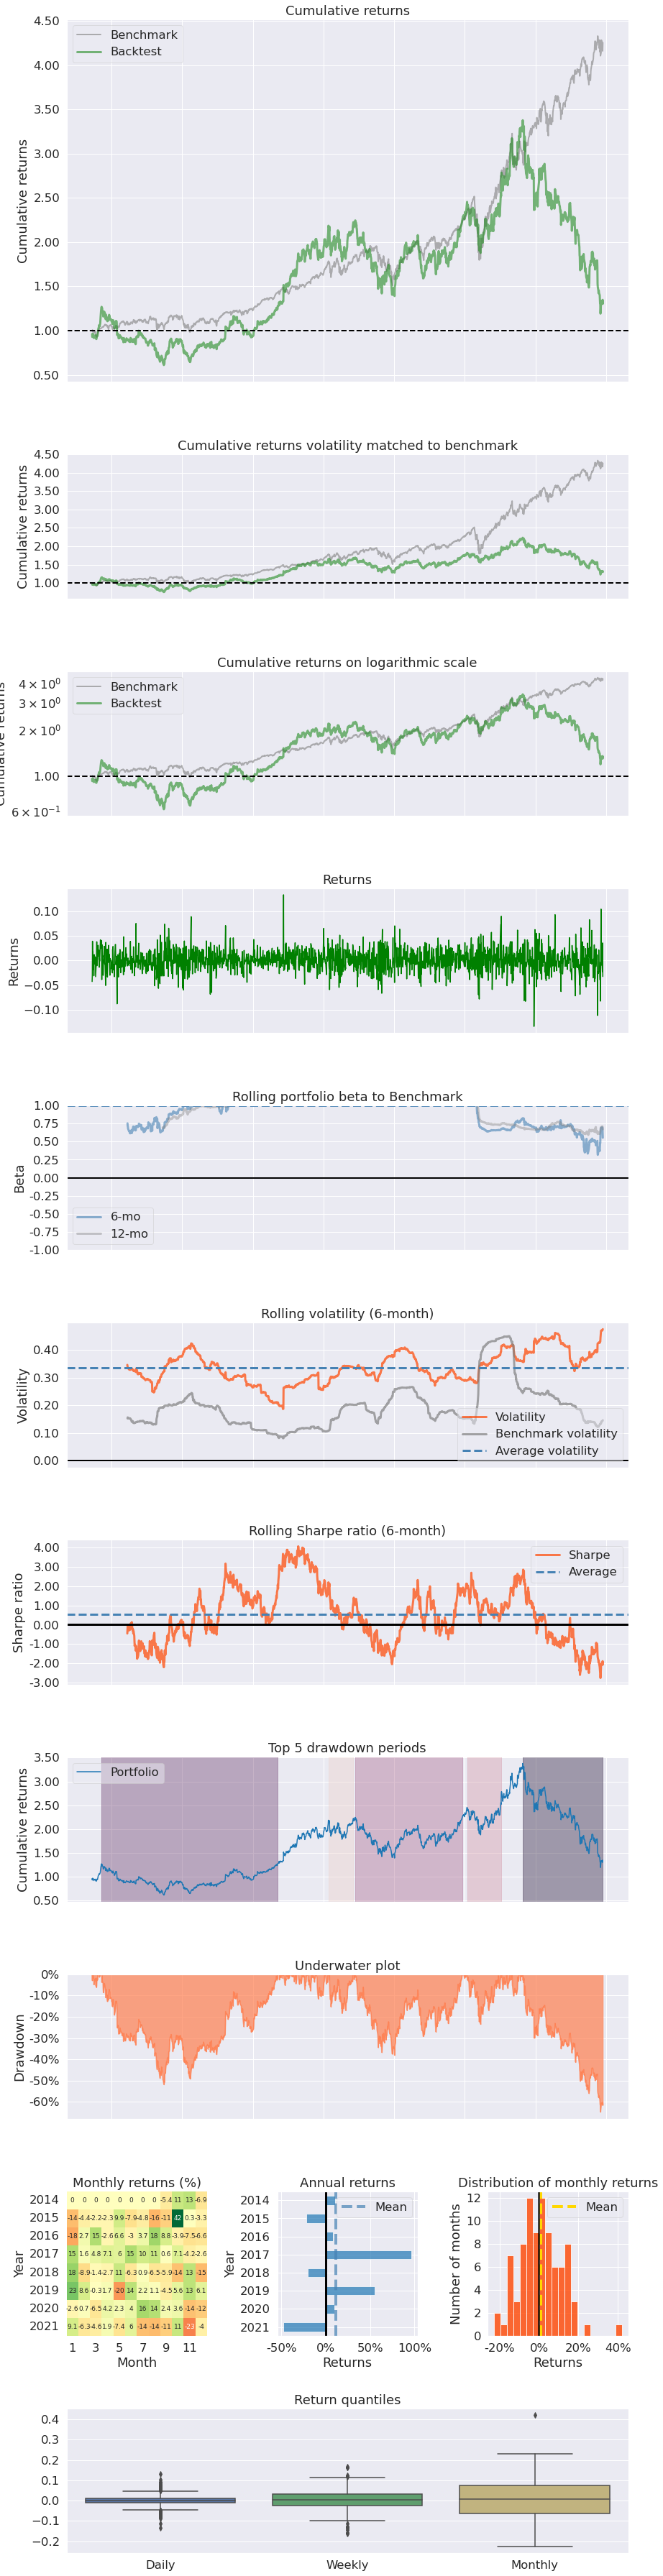

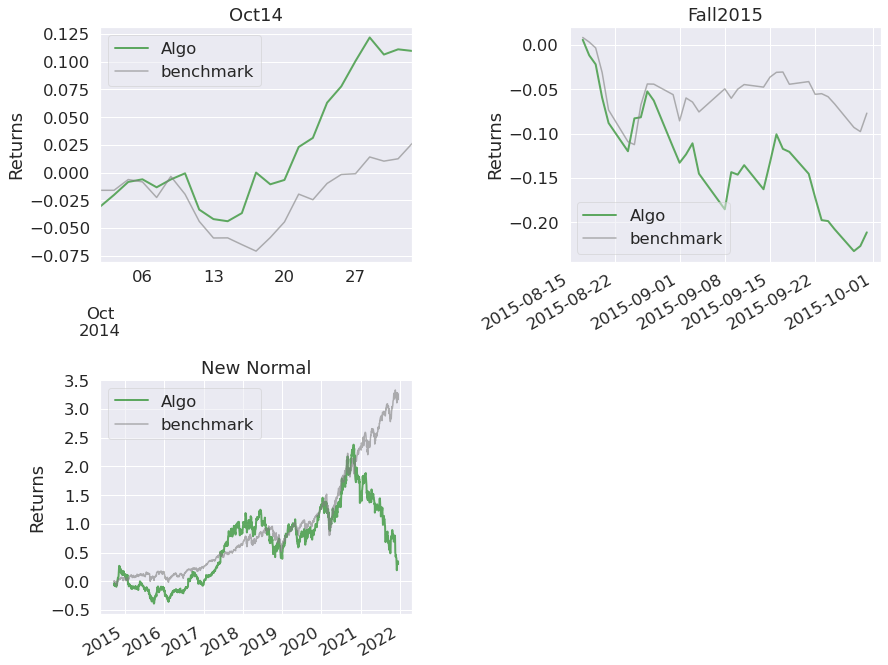

In [4]:
#输出分析报告
df_pystats = pf.timeseries.perf_stats(returns=port_rets)
pf.create_full_tear_sheet(
        returns=port_rets,
        benchmark_rets=benchmark_rets,
        
      
        )